In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))





# 1. Class Balancing (Upsample minority class)
df = pd.concat([X, y], axis=1)
df_minority = df[df['species'] == df['species'].value_counts().idxmin()]
df_majority = df[df['species'] != df['species'].value_counts().idxmin()]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),    
                                 random_state=42) 

df_balanced = pd.concat([df_majority, df_minority_upsampled])
X_balanced = df_balanced.drop('species', axis=1)
y_balanced = df_balanced['species']


X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


clf_bal = RandomForestClassifier(random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)


y_pred_bal = clf_bal.predict(X_test_bal)

print("Balanced Data Classification Report")
print(classification_report(y_test_bal, y_pred_bal))




# 2. Normalization
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

clf_norm = RandomForestClassifier(random_state=42)
clf_norm.fit(X_train_norm, y_train)

y_pred_norm = clf_norm.predict(X_test_norm)
print("Normalization Classification Report")
print(classification_report(y_test, y_pred_norm))



# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_scaled = RandomForestClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = clf_scaled.predict(X_test_scaled)
print("Feature Scaling Classification Report")
print(classification_report(y_test, y_pred_scaled))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Balanced Data Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.75      1.00      0.86         6
           2       1.00      0.87      0.93        15

    accuracy                           0.95        40
   macro avg       0.92      0.96      0.93        40
weighted avg       0.96      0.95      0.95        40

Normalization Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
   

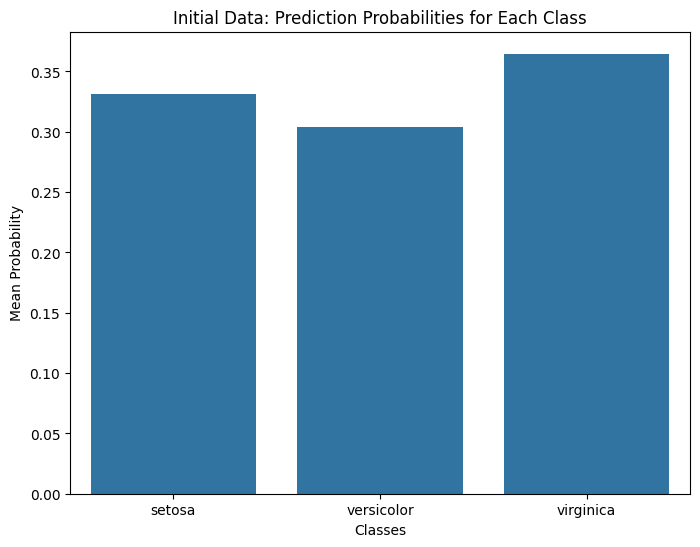

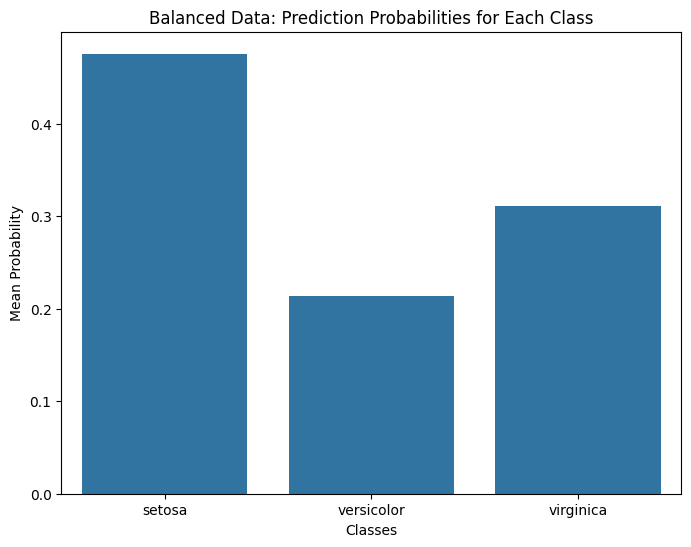

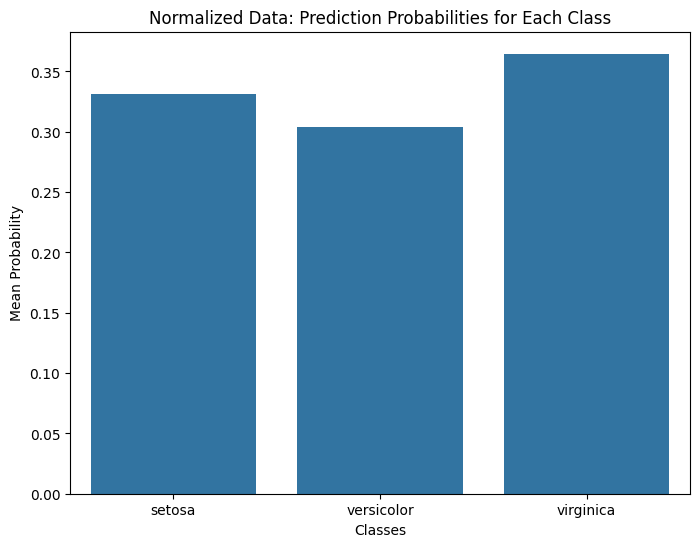

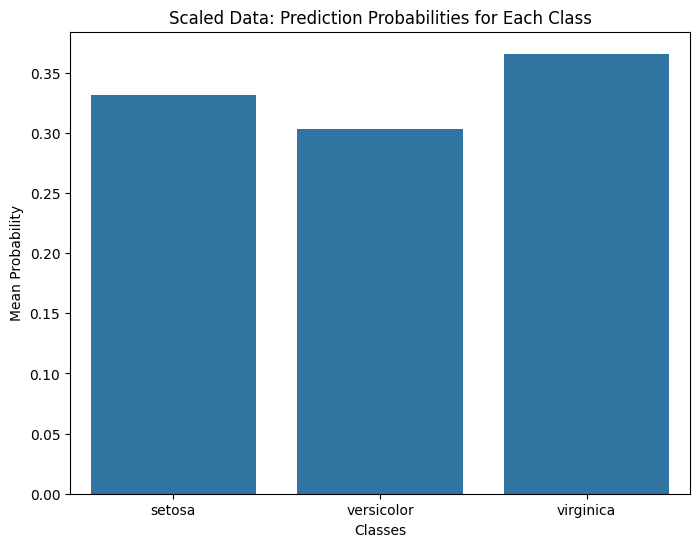

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


# unprocessed Data

prediction_probabilities = clf.predict_proba(X_test).mean(axis=0)
plt.figure(figsize=(8, 6))
sns.barplot(x=iris.target_names, y=prediction_probabilities)
plt.title('Initial Data: Prediction Probabilities for Each Class')
plt.xlabel('Classes')
plt.ylabel('Mean Probability')
plt.show()

# Balanced Data
prediction_probabilities_bal = clf_bal.predict_proba(X_test_bal).mean(axis=0)
plt.figure(figsize=(8, 6))
sns.barplot(x=iris.target_names, y=prediction_probabilities_bal)
plt.title('Balanced Data: Prediction Probabilities for Each Class')
plt.xlabel('Classes')
plt.ylabel('Mean Probability')
plt.show()

# Normalized Data
prediction_probabilities_norm = clf_norm.predict_proba(X_test_norm).mean(axis=0)
plt.figure(figsize=(8, 6))
sns.barplot(x=iris.target_names, y=prediction_probabilities_norm)
plt.title('Normalized Data: Prediction Probabilities for Each Class')
plt.xlabel('Classes')
plt.ylabel('Mean Probability')
plt.show()

# Scaled Data
prediction_probabilities_scaled = clf_scaled.predict_proba(X_test_scaled).mean(axis=0)
plt.figure(figsize=(8, 6))
sns.barplot(x=iris.target_names, y=prediction_probabilities_scaled)
plt.title('Scaled Data: Prediction Probabilities for Each Class')
plt.xlabel('Classes')
plt.ylabel('Mean Probability')
plt.show()
